In [2]:
import pandas as pd #pandas and numpy for data manipulation and numerical operations
import numpy as np
import keras #keras and tensorflow for building and training neural network models
import tensorflow as tf
import matplotlib.pyplot as plt #matplotlib.pyplot for plotting graphs
from keras.models import Sequential
from keras.layers import Dense,Flatten,MaxPooling2D,Dropout,Activation,Conv2D
import cv2 #cv2 (OpenCV) for image processing
import os #os for file and directory operations
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.preprocessing import image
from PIL import Image #PIL.Image for handling image data
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split #sklearn.model_selection for splitting data into training and testing sets
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from keras.optimizers import Adam
import pyttsx3 #pyttsx3 for text-to-speech functionality

In [2]:
#Defines the path to the dataset directory containing the traffic sign images.
path = 'Dataset' 

In [3]:
categories = os.listdir(path)
labels = [i for i in range(len(categories))]
labels_dict = dict(zip(categories,labels)) 

print(labels_dict)

{'ahead only': 0, 'beware of ice or snow': 1, 'bicycle crossing': 2, 'bumpy road': 3, 'childrens crossing': 4, 'dangerous curve left': 5, 'dangerous curve right': 6, 'double curve ahead': 7, 'end of no passing': 8, 'end of no passing vehicles over 3.5 tons': 9, 'End of speed limit 80 kilometre per hour': 10, 'end speed+passing limits': 11, 'general cation': 12, 'go straight or right': 13, 'go strainght or left': 14, 'keep left': 15, 'keep right': 16, 'no entry': 17, 'No passing': 18, 'No passing vehicle over 3.5 tons': 19, 'no vehicles': 20, 'pedestrians': 21, 'Priority road ahead': 22, 'Right-of-way at intersection': 23, 'road narrows on the right': 24, 'road work': 25, 'roundabout mandatory': 26, 'slippery road': 27, 'Speed limit 100 Kilometre per hour': 28, 'Speed limit 120 Kilometre per hour': 29, 'Speed limit 20 Kilometre per hour': 30, 'Speed limit 30 Kilometre per hour': 31, 'Speed limit 50 Kilometre per hour': 32, 'Speed limit 60 Kilometre per hour': 33, 'Speed limit 70 Kilomet

In [4]:
img_size = 100 #Specifies the size to which all images will be resized
data = []
target = []

In [5]:
for category in categories:
    folder_path = os.path.join(path,category)
    img_list = os.listdir(folder_path)
    for img_name in img_list:
        img_path = os.path.join(folder_path,img_name)
        try:
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray,(img_size,img_size))
            normalized = resized/255.0
            data.append(normalized)
            target.append(labels_dict[category])
        except Exception as e:
            print('exception',e)
        

In [6]:
data

[array([[0.30980392, 0.31372549, 0.34901961, ..., 0.70588235, 0.68627451,
         0.68235294],
        [0.30588235, 0.30980392, 0.34901961, ..., 0.69019608, 0.6745098 ,
         0.67058824],
        [0.27843137, 0.28627451, 0.34901961, ..., 0.59215686, 0.59607843,
         0.59607843],
        ...,
        [0.21960784, 0.21568627, 0.21176471, ..., 0.11764706, 0.11764706,
         0.12156863],
        [0.18823529, 0.18823529, 0.18431373, ..., 0.11372549, 0.11372549,
         0.11372549],
        [0.18431373, 0.18431373, 0.18039216, ..., 0.10980392, 0.11372549,
         0.11372549]]),
 array([[0.39215686, 0.38039216, 0.3372549 , ..., 0.43529412, 0.36078431,
         0.34509804],
        [0.39215686, 0.38431373, 0.34117647, ..., 0.43921569, 0.36078431,
         0.34509804],
        [0.41568627, 0.40392157, 0.35686275, ..., 0.45098039, 0.37254902,
         0.35686275],
        ...,
        [0.23529412, 0.23137255, 0.2       , ..., 0.13333333, 0.12156863,
         0.12156863],
        [0.2

In [7]:
target

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [8]:
data = np.array(data)

In [9]:
data.shape

(39209, 100, 100)

In [10]:
data = np.reshape(data,((data.shape[0]),img_size,img_size,1))

In [11]:
data.shape

(39209, 100, 100, 1)

In [12]:
target = np.array(target)

In [13]:
new_target = to_categorical(target)
print(new_target)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [15]:
np.save('data',data)
np.save('target',new_target)

In [2]:
data = np.load('data.npy')
target = np.load('target.npy')

In [6]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Conv Block
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Conv Block
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

C:\Users\udayk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [8]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.3,shuffle=True)

In [9]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras',monitor='val_loss',verbose=0,save_best_only=True,mode='Auto')
model = model.fit(train_data,train_target,batch_size=20,epochs=30,callbacks=[checkpoint],validation_split=0.2)

C:\Users\udayk\AppData\Local\Temp\ipykernel_22304\3156141117.py:1: UserWarning: ModelCheckpoint mode 'Auto' is unknown, fallback to auto mode.
  checkpoint = ModelCheckpoint('model-{epoch:03d}.keras',monitor='val_loss',verbose=0,save_best_only=True,mode='Auto')


Epoch 1/30
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 1257s 1s/step - accuracy: 0.1512 - loss: 3.2648 - val_accuracy: 0.7934 - val_loss: 1.0309
Epoch 2/30
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 1216s 1s/step - accuracy: 0.6593 - loss: 1.2281 - val_accuracy: 0.9200 - val_loss: 0.3590
Epoch 3/30
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 1248s 1s/step - accuracy: 0.8124 - loss: 0.6383 - val_accuracy: 0.9676 - val_loss: 0.1602
Epoch 4/30
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 1260s 1s/step - accuracy: 0.8773 - loss: 0.4131 - val_accuracy: 0.9740 - val_loss: 0.1150
Epoch 5/30
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 1243s 1s/step - accuracy: 0.9175 - loss: 0.2869 - val_accuracy: 0.9798 - val_loss: 0.0860
Epoch 6/30
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 1238s 1s/step - accuracy: 0.9347 - loss: 0.2245 - val_accuracy: 0.9838 - val_loss: 0.0712
Epoch 7/30
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 1231s 1s/step - accuracy: 0.9481 - loss: 0.1766 - val_accuracy: 0.9880 - val_loss: 0.0548
Epoch 8/30
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 1289s 1s/step - accuracy: 0.9578 -

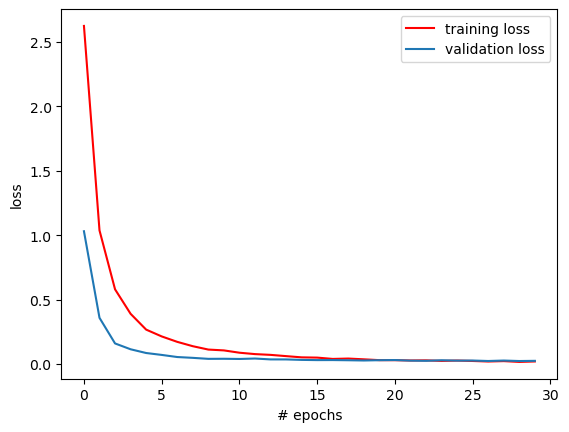

In [10]:
from matplotlib import pyplot as plt

plt.plot(model.history['loss'],'r',label='training loss')
plt.plot(model.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

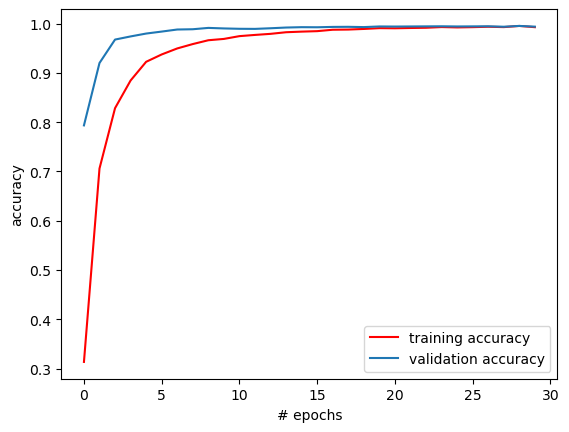

In [11]:
plt.plot(model.history['accuracy'],'r',label='training accuracy')
plt.plot(model.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [15]:
model.model.save('best_model_new.keras')  # Load the best model

In [3]:
model = load_model('best_model_new.keras')

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 98, 98, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 47, 47, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 21, 21, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      13,107,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,859,267 (155.87 MB)

 Trainable params: 13,619,755 (51.96 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,239,512 (103.91 MB)

In [9]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
h, w = 100, 100
img = image.load_img('5.png', target_size=(h, w))  # Load image
imag = cv2.imread('5.png')
img = image.img_to_array(img)  # Convert to array
gray = cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2GRAY)  # Convert to grayscale

out = np.expand_dims(gray, axis=0)  # Add batch dimension
final_img = out / 255.0  # Normalize to [0,1]

# Predict using the model
pred = model.predict(final_img)
print('Pred =', pred)

# Identify the class with the highest probability
max_index = np.argmax(pred[0])
print('Predicted Class Index =', max_index)

# Define the list of emotions (traffic signs in this case)
signs = (
    'ahead only',
    'beware of ice or snow',
    'bicycle crossing',
    'bumpy road',
    'children crossing',
    'dangerous curve left',
    'dangerous curve right',
    'double curve ahead',
    'end of no passing',
    'end of no passing vehicles over 3.5 tons',
    'End of speed limit 80 kilometre per hour',
    'end speed+passing limits',
    'general caution',
    'go straight or right',
    'go straight or left',
    'keep left',
    'keep right',
    'no entry',
    'No passing',
    'No passing vehicle over 3.5 tons',
    'no vehicles',
    'pedestrians',
    'Priority road ahead',
    'Right-of-way at intersection',
    'road narrows on the right',
    'road work',
    'roundabout mandatory',
    'slippery road',
    'Speed limit 100 Kilometre per hour',
    'Speed limit 120 Kilometre per hour',
    'Speed limit 20 Kilometre per hour',
    'Speed limit 30 Kilometre per hour',
    'Speed limit 50 Kilometre per hour',
    'Speed limit 60 Kilometre per hour',
    'Speed limit 70 Kilometre per hour',
    'Speed limit 80 Kilometre per hour',
    'stop',
    'traffic signals',
    'turn left ahead',
    'turn right ahead',
    'vehicles over 3.5 tons prohibited',
    'wild animals crossing',
    'yield'
)

# Get the predicted emotion/traffic sign
predicted_sign = signs[max_index]
print('Predicted Traffic Sign =', predicted_emotion)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Pred = [[0.00000000e+00 0.00000000e+00 3.57464265e-37 0.00000000e+00
  0.00000000e+00 1.05620749e-36 0.00000000e+00 4.75103325e-28
  0.00000000e+00 1.89457360e-35 1.36845516e-23 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00832487e-36 3.16713572e-24
  6.43165195e-33 0.00000000e+00 1.15186921e-34 0.00000000e+00
  0.00000000e+00 4.71158340e-34 8.38172931e-35 0.00000000e+00
  2.47137495e-21 4.44059935e-34 1.46516696e-31 1.53245420e-11
  1.77797954e-15 1.06943245e-21 4.60857409e-33 1.00000000e+00
  1.15014316e-35 0.00000000e+00 0.00000000e+00 1.93765991e-36
  0.00000000e+00 1.74712291e-26 0.00000000e+00]]
Predicted Class Index = 35
Predicted Traffic Sign = Speed limit 80 Kilometre per hour


<function matplotlib.pyplot.show(close=None, block=None)>

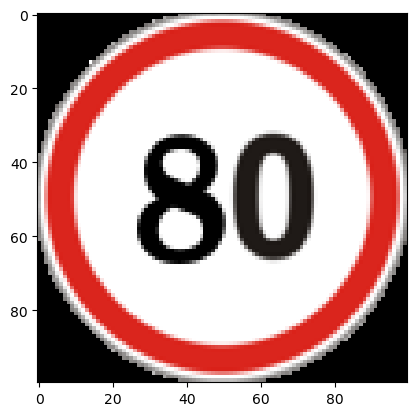

In [10]:
plt.imshow(cv2.cvtColor(imag,cv2.COLOR_BGR2RGB))
plt.show 

In [11]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath   # Temporarily override PosixPath with WindowsPath to simulate Windows path handling on a Unix-like system

In [12]:
import cv2
import torch
import numpy as np
from tensorflow.keras.models import load_model
import pyttsx3



# Load your trained YOLOv5 model
model_yolo = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt',force_reload=True)

# Initialize text-to-speech engine
engine = pyttsx3.init()
engine.setProperty('rate', 150)

# Define the list of traffic sign classes
signs = [
    'ahead only', 'beware of ice or snow', 'bicycle crossing', 'bumpy road', 'childrens crossing',
    'dangerous curve left', 'dangerous curve right', 'double curve ahead', 'end of no passing',
    'end of no passing vehicles over 3.5 tons', 'End of speed limit 80 kilometre per hour',
    'end speed+passing limits', 'general caution', 'go straight or right', 'go straight or left',
    'keep left', 'keep right', 'no entry', 'No passing', 'No passing vehicle over 3.5 tons',
    'no vehicles', 'pedestrians', 'Priority road ahead', 'Right-of-way at intersection',
    'road narrows on the right', 'road work', 'roundabout mandatory', 'slippery road',
    'Speed limit 100 Kilometre per hour', 'Speed limit 120 Kilometre per hour',
    'Speed limit 20 Kilometre per hour', 'Speed limit 30 Kilometre per hour',
    'Speed limit 50 Kilometre per hour', 'Speed limit 60 Kilometre per hour',
    'Speed limit 70 Kilometre per hour', 'Speed limit 80 Kilometre per hour', 'stop',
    'traffic signals', 'turn left ahead', 'turn right ahead', 'vehicles over 3.5 tons prohibited',
    'wild animals crossing', 'yield'
]

# Set target size for the model input
h, w = 100, 100

# Initialize the webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        print("Error: Could not read frame.")
        break
    
    # Detect objects in the frame using the trained YOLO model
    results = model_yolo(frame)
    
    # Process detections
    for detection in results.xyxy[0]:
        xmin, ymin, xmax, ymax, conf, cls = detection[:6].cpu().numpy()
        
        # Extract the detected region
        region = frame[int(ymin):int(ymax), int(xmin):int(xmax)]
        
        if region.size == 0:
            continue
        
        # Resize region to the target size
        resized_region = cv2.resize(region, (h, w))
        
        # Convert region to grayscale
        gray = cv2.cvtColor(resized_region, cv2.COLOR_BGR2GRAY)
        
        # Expand dimensions to match the model input
        final_img = np.expand_dims(gray, axis=(0, -1))  # Add batch and channel dimensions
        final_img1 = final_img / 255.0  # Normalize the image

        # Predict the class
        pred = model.predict(final_img1)
        
        # Get the index of the highest value
        max_index = np.argmax(pred[0])
        
        # Get the predicted class name
        predicted_emotion = emotions[max_index]
        
        # Display the predicted class on the original frame
        cv2.putText(frame, predicted_emotion, (int(xmin), int(ymin)-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        cv2.rectangle(frame, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
        
        # Text-to-speech output
        engine.say(predicted_emotion)
        engine.runAndWait()
    
    # Display the resulting frame
    cv2.imshow('Traffic Sign Detection', frame)
    
    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\udayk/.cache\torch\hub\master.zip
YOLOv5  2024-8-20 Python-3.11.7 torch-2.4.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
C:\Users\udayk/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


C:\Users\udayk/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\udayk/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\udayk/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\udayk/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


C:\Users\udayk/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


C:\Users\udayk/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


C:\Users\udayk/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


C:\Users\udayk/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


C:\Users\udayk/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


C:\Users\udayk/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
